### Selenium 개요
- BeautifulSopu 패키지만을 사용하여 크롤링을 할 경우, 모든 웹페이지의 데이터들을 가져오는 것은 아니다.
- 예를들어, 비동기적으로 뒤늦게 웹페이지의 정보를 업데이트하는 경우와 로그인이나 특정권한을 요구하는 웹페이지의 경우가 그럴것이다.
- 이때 필요로 하는 패키지가 바로 셀레늄(Selenium)이며, 별도의 webdriver라는 API를 통해 운영체제에 설치된 브라우저를 제어할 수 있다.
- 즉, 셀레늄을 사용하면 웹페이지상에서 눈에 보이는 모든 데이터를 가져올 수 있다.
- 참조 : http://www.seleniumhq.org/projects/webdriver/

### Selenium 환경 설정 방법
### 1. Selenium Package Install
- Anaconda Prompt 에서 pip install selenium 실행

### 2. Webdriver Down & Install
- 가장 보편적으로 많이 사용하는 크롬 웹드라이브를 다운받아서 설치한다.
- 아래 사이트에서 OS에 맞는 웹드라이브를 다운받아 압축을 풀어 driver 폴더에 복사해둔다.
- 크롬 웹드라이브 다운 : https://chromedriver.storage.googleapis.com/index.html?path=2.35/

#### Selenium 예제

In [3]:
!pip install selenium

In [4]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image

import re

In [6]:
#웹드라이브로 크롬브라우즈 띄운다.
driver_path = "driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path = driver_path)

In [8]:
url_page = 'http://www.seleniumhq.org/projects/webdriver/'
driver.get(url_page)

In [9]:
driver.find_element_by_css_selector('#menu_download > a').click()

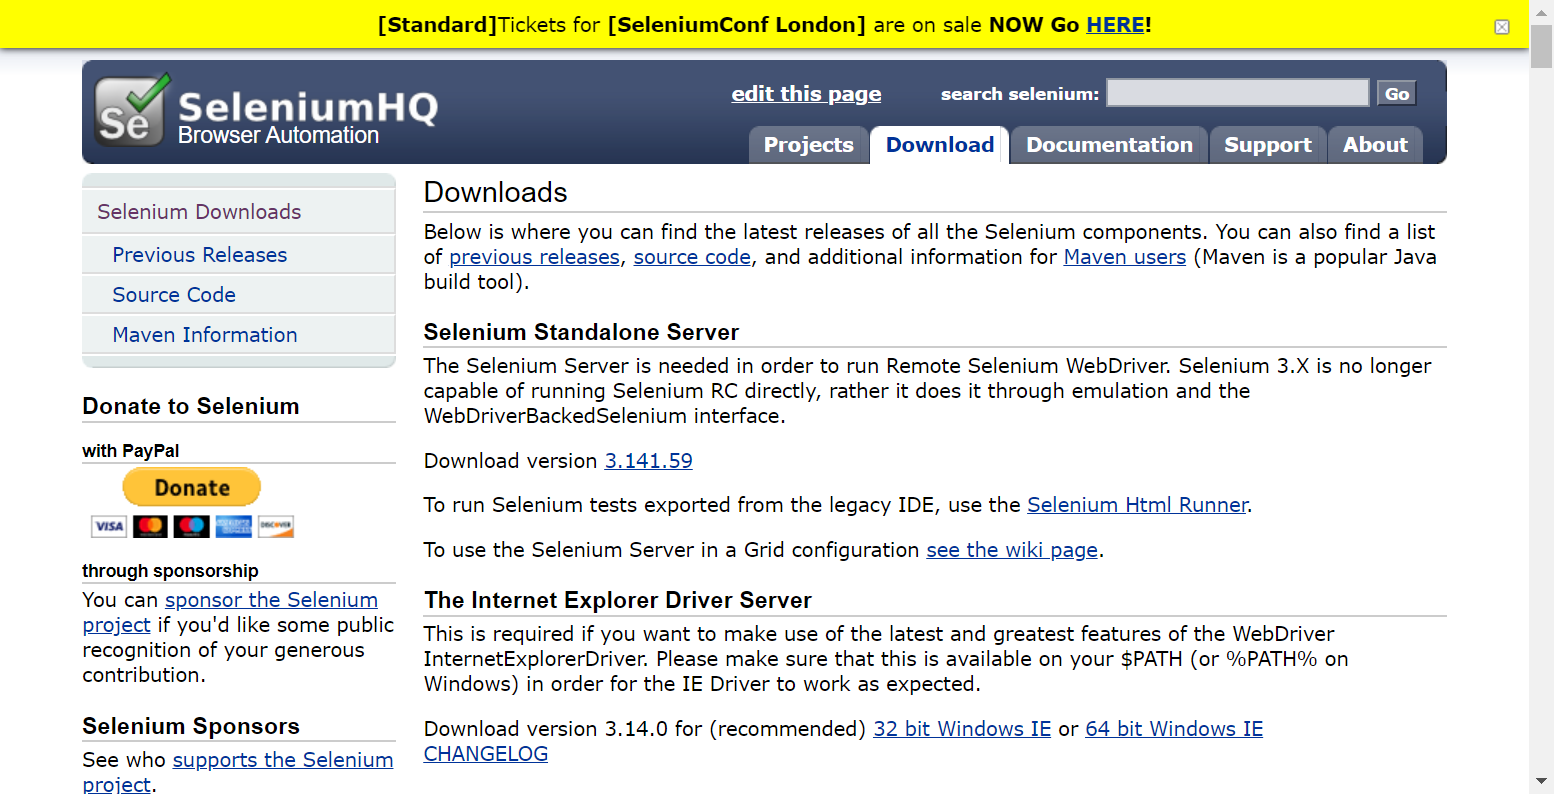

In [10]:
capture_img = './images/seleniumhq_download.png'
driver.save_screenshot(capture_img)
Image(capture_img)

#### 네이버 크롤링

In [11]:
url_page = 'http://www.naver.com'
driver.get(url_page)

In [13]:
#영화 있는 곳으로 갈꺼에요!
#XQury
driver.find_element_by_xpath('//*[@id="PM_ID_serviceNavi"]/li[6]/a').click()

In [14]:
#참고
# jQuery
# driver.find_element_by_css_selector('#PM_ID_serviceNavi > li:nth-child(6) > a').click()

In [16]:
# 평점&리뷰 1등 페이지로 이동
driver.find_element_by_css_selector("#review1 > div > a > strong").click()

In [17]:
# 리뷰 클릭
driver.find_element_by_css_selector('#movieEndTabMenu > li:nth-child(6) > a').click()

In [18]:
current_url = driver.current_url
current_url

'https://movie.naver.com/movie/bi/mi/review.nhn?code=167560'

In [20]:
# pattern = re.compile("[\d+,?]+")

pattern = re.compile("\d{6}")
result = pattern.findall(current_url)
result

['167560']

In [21]:
code = result[0] if len(result)>0 else ""
code

'167560'

In [22]:
review_url = current_url.replace(code, '{}')
review_url

'https://movie.naver.com/movie/bi/mi/review.nhn?code={}'

#### NAVER 영화 리뷰페이지로 바로 이동

In [24]:
# 영화제목 검색키 입력
movie_title = '알라딘'
driver.find_element_by_css_selector("#ipt_tx_srch").send_keys(movie_title)

In [25]:
#검색클릭
driver.find_element_by_css_selector("#jSearchArea > div > button").click()

In [26]:
# 검색 첫번째 페이지로 이동
driver.find_element_by_css_selector("#old_content > ul:nth-child(4) > li:nth-child(1) > dl > dt > a > strong").click()

In [27]:
# 페이지 BeautifulSoup 객체로 가져온다
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')

In [28]:
soup.title

<title>알라딘 : 네이버 영화</title>

In [29]:
current_url = driver.current_url
current_url

'https://movie.naver.com/movie/bi/mi/basic.nhn?code=163788'

In [30]:
pattern = re.compile('\d{6}')
result = pattern.findall(current_url)
code = result[0] if len(result) >0 else ""
code

'163788'

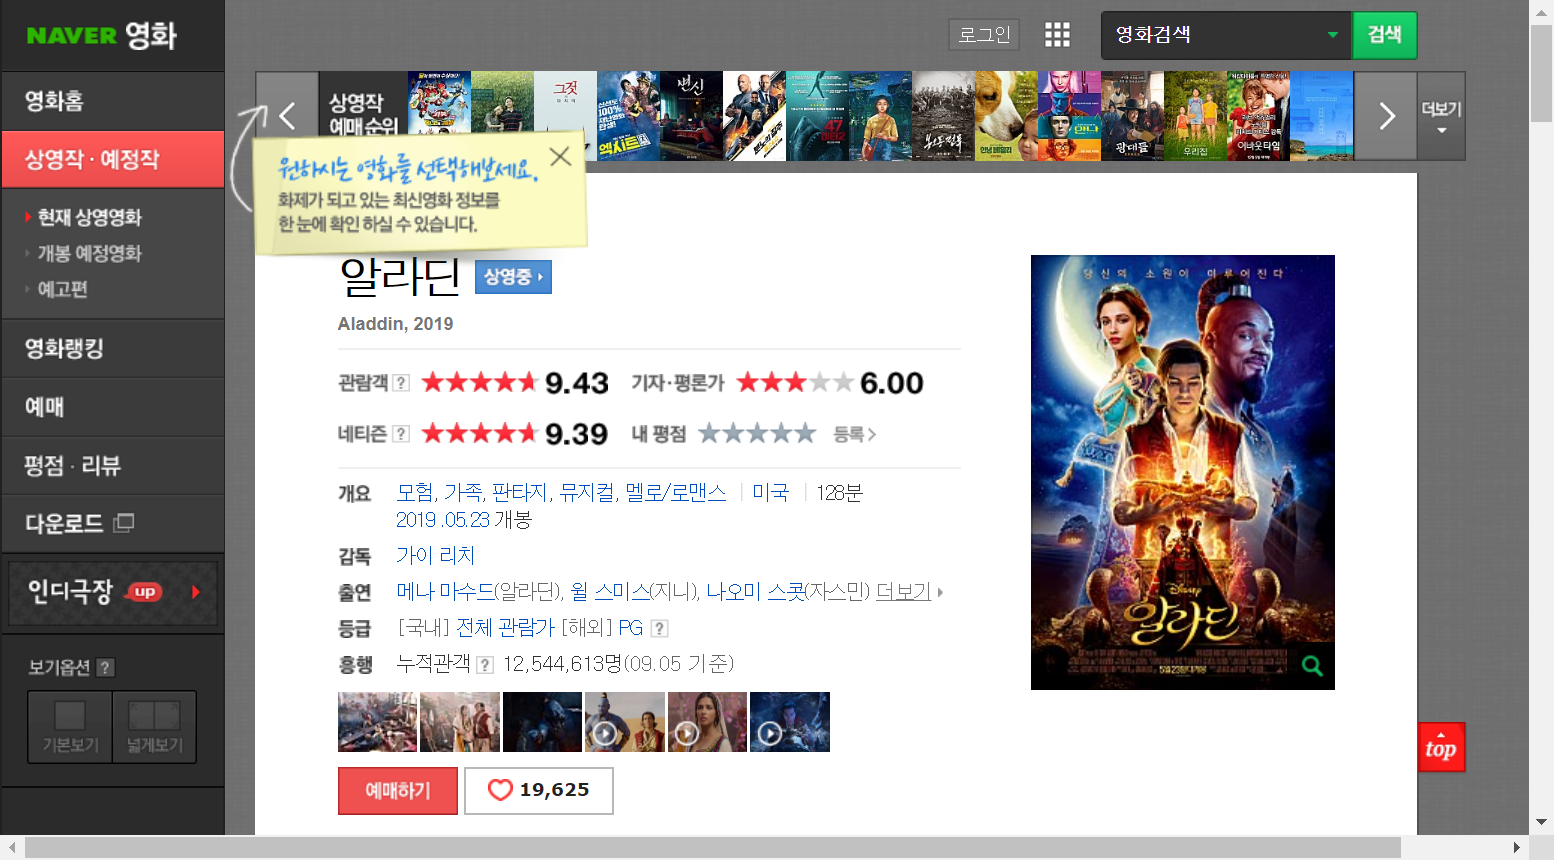

In [34]:
# 영화메인페이지 캡처후 저장
capture_image = './images/naver_movie_{code}.png'.format(code=code)
driver.save_screenshot(capture_image)
Image(capture_image)

In [35]:
# 리뷰페이지로 바로 이동
url_page = review_url.format(code)
driver.get(url_page)

In [36]:
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
soup.title

<title>알라딘 : 네이버 영화</title>

In [37]:
movie_title = soup.title.get_text().split(':')[0].strip()
movie_title

'알라딘'

In [38]:
### 여기서 왜 span/cnt ??????
review_cnt = soup.find("span", "cnt")
review_cnt

<span class="cnt">총<em>635</em>건</span>

In [39]:
review_cnt2 = review_cnt.find('em').get_text()
review_cnt2

'635'

In [40]:
#나중에 통계내려면 interger타입으로 바꾸어주어야 한다.
review_cnt_total = int(review_cnt2.replace(',',""))
review_cnt_total

635

In [41]:
last_page = review_cnt_total//10 + 1
last_page

64

In [42]:
'영화 "{}"의 리뷰수는 총 {}건이며, 마지막 페이지는 {} 입니다.'.format(movie_title, review_cnt_total, last_page)

'영화 "알라딘"의 리뷰수는 총 635건이며, 마지막 페이지는 64 입니다.'

In [43]:
# 리뷰 마지막 페이지로 이동
url_page = 'https://movie.naver.com/movie/bi/mi/review.nhn?code={}&page={}'.format(code, last_page)
driver.get(url_page)